<a href="https://colab.research.google.com/github/s1230038/autoencoder/blob/master/I_divergenceAutoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Simple Autoencoder not using I-divergence
# Original: https://elix-tech.github.io/ja/2016/07/17/autoencoder.html
# https://colab.research.google.com/drive/1Z_d8APkMUDwXDQIg3OI7E13vH8IZhusM?authuser=1#scrollTo=WmBfOis_mWCH
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
import numpy as np
from keras.datasets import mnist
from keras import backend as K
from keras import metrics

# imititing mean_squared_error():
# 青イルカ P.57では二乗誤差の総和を使用しているが、これをKerasで実装する場合は平均二乗誤差（mean_squared_error)
# をloss に渡す必要がある。なぜなら、Kerasはミニバッチでfit()を計算するからである。青イルカ P.27参照。
# 𝒙 ̂_𝑛 :y_pred,  𝒙_𝑛 : y_true, because x_n is training data which means label.
def i_divergence(y_true, y_pred):
  print("Call i_divergence")
  y_true = K.clip(y_true, K.epsilon(), 1)
  y_pred = K.clip(y_pred, K.epsilon(), 1)
  return K.mean(y_pred * K.log(y_pred / y_true) - y_pred + y_true, axis=-1)
# return K.mean(y_true * K.log(y_true / y_pred) - y_true + y_pred, axis=-1)


encoding_dim = 32
input_img = Input(shape=(784,))
#　Let us apply ReLU to both encoder activation and decoder activation。 
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(784, activation='relu')(encoded) 
autoencoder = Model(inputs=input_img, outputs=decoded) # https://medium.com/@zhuixiyou/userwarning-update-your-model-call-to-the-keras-2-api-8a6a5955daac

autoencoder.compile(optimizer='adam', metrics=[metrics.binary_accuracy], loss=i_divergence)

# Download MNIST and standardize, learning
(x_train, _), (x_test, _) = mnist.load_data()
# we will restrict domain of definition of the input data to the below expression with normalization of the input.
x_train = x_train.astype('float32') / 255. # 画像データは0から1の値を取るように規格化
x_test = x_test.astype('float32') / 255.
# x_trainは (60000, 28, 28) という形をしていますが、784次元の入力になるように (60000, 784) に変形
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

autoencoder.fit(x_train, x_train,
                nb_epoch=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))


Call i_divergence


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:43: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 2s 37us/step - loss: 0.1373 - binary_accuracy: 0.8088 - val_loss: 0.1325 - val_binary_accuracy: 0.8072
Epoch 2/50
60000/60000 [==============================] - 1s 25us/step - loss: 0.1306 - binary_accuracy: 0.8088 - val_loss: 0.1324 - val_binary_accuracy: 0.8072
Epoch 3/50
60000/60000 [==============================] - 1s 24us/step - loss: 0.1305 - binary_accuracy: 0.8088 - val_loss: 0.1322 - val_binary_accuracy: 0.8072
Epoch 4/50
60000/60000 [==============================] - 1s 23us/step - loss: 0.1298 - binary_accuracy: 0.8088 - val_loss: 0.1305 - val_binary_accuracy: 0.8073
Epoch 5/50
60000/60000 [==============================] - 1s 23us/step - loss: 0.1268 - binary_accuracy: 0.8089 - val_loss: 0.1271 - val_binary_accuracy: 0.8075
Epoch 6/50
60000/60000 [==============================] - 1s 24us/step - loss: 0.1238 - binary_accuracy: 0.8091 - val_loss: 0.1216 - val_binary_a

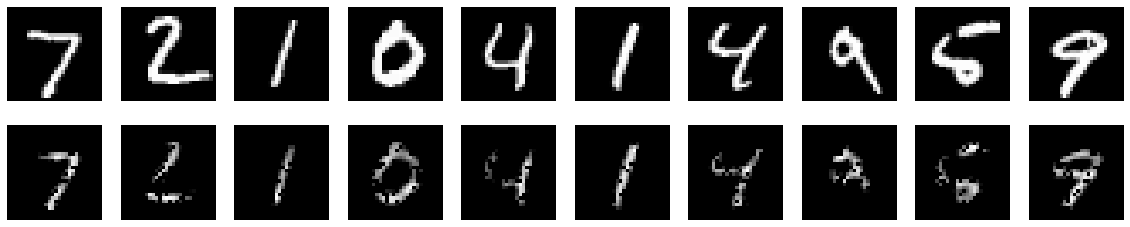

In [3]:
import matplotlib.pyplot as plt

# 学習した重みを保存したり、読み込みたい場合
autoencoder.save_weights('autoencoder.h5')
autoencoder.load_weights('autoencoder.h5')

# テスト画像を変換
decoded_imgs = autoencoder.predict(x_test)

# 何個表示するか
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # オリジナルのテスト画像を表示
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # 変換された画像を表示
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()